# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data?resource=download . Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
# Your code here
import pandas as pd
import numpy as np

fraud = pd.read_csv("Fraud.csv").sample(100000)
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
747447,38,CASH_OUT,351780.14,C234335490,0.0,0.00,C117289614,1225615.74,1577395.88,0,0
472499,19,CASH_OUT,276311.64,C283785115,0.0,0.00,C217255342,1049102.08,1200699.81,0,0
1016787,47,PAYMENT,15442.87,C895745752,17371.8,1928.93,M1609135407,0.00,0.00,0,0
225918,14,PAYMENT,7767.07,C1384328716,0.0,0.00,M135819305,0.00,0.00,0,0
927350,43,CASH_OUT,127710.81,C1089691509,0.0,0.00,C1468064341,514043.04,641753.86,0,0


### What is the distribution of the outcome? 

<AxesSubplot:ylabel='Frequency'>

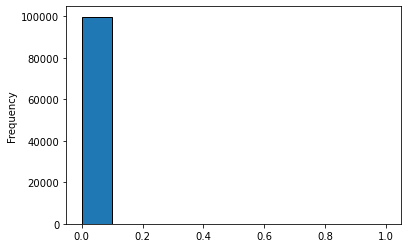

In [2]:
# Your response here
fraud['isFraud'].plot(kind = 'hist', edgecolor = 'black')

In [3]:
fraud['isFraud'].value_counts()

0    99886
1      114
Name: isFraud, dtype: int64

### Clean the dataset. Pre-process it to make it suitable for ML training. Feel free to explore, drop, encode, transform, etc. Whatever you feel will improve the model score.

In [4]:
# lets analyze types of variables
fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
# lets have a look at objects (non numeric variables), is it worth it to mantain and modify them?
fraud['type'].value_counts()

# we can see there are 5 different types. We should keep them because they are relevant data

CASH_OUT    35419
PAYMENT     33884
CASH_IN     21760
TRANSFER     8288
DEBIT         649
Name: type, dtype: int64

In [6]:
fraud['nameOrig'].value_counts()

# waaay too much different values!!! is it an identifyer? not useful, lets drop it

C940075559     2
C1095346997    2
C1842781381    2
C1736268937    2
C2034749029    1
              ..
C753196493     1
C1853066385    1
C1087075212    1
C688072625     1
C1706874903    1
Name: nameOrig, Length: 99996, dtype: int64

In [7]:
fraud['nameDest'].value_counts()

# same, way too mach different values. will be difficult to be labeled and brings no relevant info
# lets drop them

fraud.drop(labels = ['nameOrig', 'nameDest'], axis = 1, inplace = True)

In [8]:
fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
747447,38,CASH_OUT,351780.14,0.0,0.00,1225615.74,1577395.88,0,0
472499,19,CASH_OUT,276311.64,0.0,0.00,1049102.08,1200699.81,0,0
1016787,47,PAYMENT,15442.87,17371.8,1928.93,0.00,0.00,0,0
225918,14,PAYMENT,7767.07,0.0,0.00,0.00,0.00,0,0
927350,43,CASH_OUT,127710.81,0.0,0.00,514043.04,641753.86,0,0


In [9]:
fraud.dtypes

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
# Lets transform type into numerical
pd.get_dummies(fraud['type'], prefix = 'Type', drop_first = True)

,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER
747447,1,0,0,0
472499,1,0,0,0
1016787,0,0,1,0
225918,0,0,1,0
927350,1,0,0,0
...,...,...,...,...
328596,0,0,0,0
1043652,0,0,0,0
491280,1,0,0,0
326412,0,0,0,1


In [11]:
fraud_transformed = pd.merge(left = fraud,
                              right = pd.get_dummies(fraud['type'], prefix = 'Type', drop_first = True),
                              left_index=True,
                              right_index=True)
fraud_transformed

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER
747447,38,CASH_OUT,351780.14,0.00,0.00,1225615.74,1577395.88,0,0,1,0,0,0
472499,19,CASH_OUT,276311.64,0.00,0.00,1049102.08,1200699.81,0,0,1,0,0,0
1016787,47,PAYMENT,15442.87,17371.80,1928.93,0.00,0.00,0,0,0,0,1,0
225918,14,PAYMENT,7767.07,0.00,0.00,0.00,0.00,0,0,0,0,1,0
927350,43,CASH_OUT,127710.81,0.00,0.00,514043.04,641753.86,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328596,16,CASH_IN,432470.97,200214.00,632684.97,66997.44,0.00,0,0,0,0,0,0
1043652,94,CASH_IN,135220.97,9801735.43,9936956.39,1042958.25,907737.29,0,0,0,0,0,0
491280,19,CASH_OUT,59795.78,41337.00,0.00,2368811.38,2180684.20,0,0,1,0,0,0
326412,16,TRANSFER,594257.33,146.00,0.00,247506.34,841763.67,0,0,0,0,0,1


In [12]:
fraud_transformed.drop(labels = 'type', axis = 1, inplace = True)

In [13]:
fraud_transformed.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER
747447,38,351780.14,0.0,0.00,1225615.74,1577395.88,0,0,1,0,0,0
472499,19,276311.64,0.0,0.00,1049102.08,1200699.81,0,0,1,0,0,0
1016787,47,15442.87,17371.8,1928.93,0.00,0.00,0,0,0,0,1,0
225918,14,7767.07,0.0,0.00,0.00,0.00,0,0,0,0,1,0
927350,43,127710.81,0.0,0.00,514043.04,641753.86,0,0,1,0,0,0


In [14]:
# Lets see collinearity among features
import seaborn as sns

<AxesSubplot:>

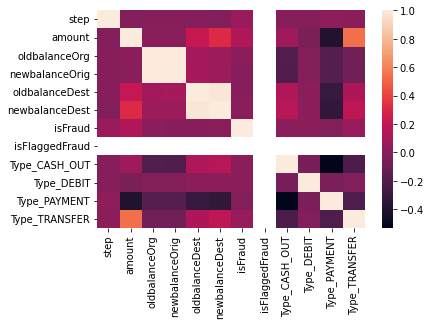

In [15]:
sns.heatmap(fraud_transformed.corr())

In [16]:
# I feel like there is too much collinearity among some variables... and what the hell is wrong with IsFlaggered Column?
print(fraud_transformed['isFlaggedFraud'].value_counts())
print(fraud_transformed['isFlaggedFraud'].isna().sum())

# so basically all of them are null... not sure if I should drop it

0    100000
Name: isFlaggedFraud, dtype: int64
0


In [17]:
fraud_transformed['isFlaggedFraud'].isnull()

747447     False
472499     False
1016787    False
225918     False
927350     False
           ...  
328596     False
1043652    False
491280     False
326412     False
915799     False
Name: isFlaggedFraud, Length: 100000, dtype: bool

### Run a logisitc regression classifier and evaluate its accuracy.

In [18]:
fraud_transformed.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'Type_CASH_OUT',
       'Type_DEBIT', 'Type_PAYMENT', 'Type_TRANSFER'],
      dtype='object')

In [19]:
# Your code here -- stablish my dependent (y) and independent variables (X)
y = fraud_transformed['isFraud']
X = fraud_transformed.drop(labels='isFraud', axis=1)

In [20]:
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy = lr.score(X_test, y_test)*100
print(accuracy)

99.925


### Now pick a model of your choice and evaluate its accuracy.

In [47]:
# Your code here -- Lets try all of them B-) but first lest normalize... Not sure if I sould normalize

### 1 - KNN

In [23]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
normalizer = normalizer.fit(X_train)

In [24]:
X_train_normalized = normalizer.transform(X_train) # we create the normalizer
X_train_normalized = pd.DataFrame(X_train_normalized,columns=X_train.columns) # we use the normalizer to notmalize the data
X_train_normalized.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER
0,0.127660,0.009953,0.000000,0.000000,0.003760,0.006174,0.0,1.0,0.0,0.0,0.0
1,0.202128,0.032360,0.000000,0.000000,0.086301,0.094326,0.0,1.0,0.0,0.0,0.0
2,0.989362,0.000713,0.000016,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
3,0.404255,0.001504,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
4,0.414894,0.001857,0.001361,0.000869,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0


In [25]:
X_test_normalized = normalizer.transform(X_test)
X_test_normalized = pd.DataFrame(X_test_normalized,columns = X_test.columns)
X_test_normalized.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,Type_CASH_OUT,Type_DEBIT,Type_PAYMENT,Type_TRANSFER
0,0.180851,6.080000e-07,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
1,0.180851,6.170340e-04,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0
2,0.170213,3.217710e-03,0.266491,0.265789,0.002803,0.002846,0.0,0.0,0.0,0.0,0.0
3,0.000000,2.493620e-03,0.127285,0.127607,0.002516,0.001025,0.0,0.0,0.0,0.0,0.0
4,0.180851,5.091966e-03,0.000050,0.001390,0.001328,0.000000,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
knn = KNeighborsRegressor(n_neighbors=3)

In [27]:
# training the model on raw data
knn.fit(X_train, y_train) # training is something I will always do
# testing algorithm on raw test
pred = knn.predict(X_test)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
# let's see if this normalization improves our model
# creating model 
knn = KNeighborsRegressor(n_neighbors=3)

# training the model on normalized data
knn.fit(X_train_normalized, y_train)

# testing algorithm on normalized test
pred = knn.predict(X_test_normalized)

np.sqrt(mean_squared_error(y_test,pred))
#much better!

0.02173067468400883

### 2 - Logistic Regression and Metrics

In [31]:
from sklearn.linear_model import LogisticRegression

# initialize the model
model = LogisticRegression()

# training your model on the training datasets -> where the algorithm will learn
model = model.fit(X_train, y_train)

In [32]:
#Basic Accuracy data
print("test data accuracy was ",model.score(X_test,y_test))
print("train data accuracy was ", model.score(X_train, y_train))

test data accuracy was  0.99925
train data accuracy was  0.999275


In [33]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.99925

In [34]:
# metrics for determining the performance of my model
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[19977,     4],
       [   11,     8]], dtype=int64)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19981
           1       0.67      0.42      0.52        19

    accuracy                           1.00     20000
   macro avg       0.83      0.71      0.76     20000
weighted avg       1.00      1.00      1.00     20000



In [36]:
# nope... this algorithm is not working well... how could I improve it?

### Decision Trees

In [37]:
from sklearn.tree import DecisionTreeClassifier
# we are going to take the breast cancer data

In [38]:
model = DecisionTreeClassifier(max_depth = 10) # max depth - max number of questions (who is who example)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [39]:
print("test data accuracy was ",model.score(X_test,y_test))
print("train data accuracy was ",model.score(X_train,y_train))

test data accuracy was  0.9998
train data accuracy was  0.999875


In [40]:
max_depth = range(1,30) # depth is how many questions are we allowed to ask
test = []
train = []

for depth in max_depth:
  model = DecisionTreeClassifier(max_depth= depth)
  model.fit(X_train, y_train)
  test.append(model.score(X_test,y_test))
  train.append(model.score(X_train,y_train))

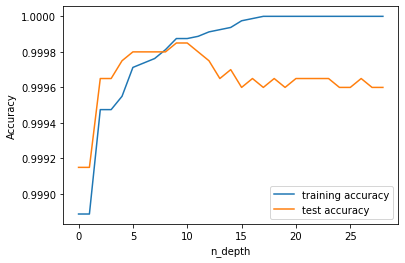

In [41]:
import matplotlib.pyplot as plt
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

In [42]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
y_pred = tree.predict(X_test)
accuracy = tree.score(X_test, y_test)*100
accuracy

99.965

In [44]:
# confussion matrix
confusion_matrix = confusion_matrix(y_test, pred)
print(confusion_matrix) # not woking: "'numpy.ndarray' object is not callable"

[[19977     4]
 [   11     8]]


In [46]:
print('Precision ', confusion_matrix[1,1]/(confusion_matrix[0,1] + confusion_matrix[1,1]))

Precision  0.6666666666666666


### Which model worked better and how do you know?

In [2]:
# Your response here
print("Not sure... I would say Logistics Regression but I am not able to compute precision")

Not sure... I would say Logistics Regression but I am not able to compute precision


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.